In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("my_mutiple regression.csv") # upload your CSV
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [3]:
df.corr()

,age,experience,income
age,1.000000,0.615165,0.532204
experience,0.615165,1.000000,0.984227
income,0.532204,0.984227,1.000000


In [4]:
X_raw = df[['age', 'experience']].values
y = df['income'].values.reshape(-1, 1)

In [5]:
# 2. FEATURE SCALING
# --------------------------
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)

In [6]:
# Add intercept term
m = X.shape[0]
X = np.hstack([np.ones((m,1)), X])  # (m x 3)

In [7]:
#HYPOTHESIS FUNCTION

def hypothesis(X, theta):
    return np.dot(X, theta)


In [8]:
# COST FUNCTION WITH REGULARIZATION
def cost_function(X, y, theta, lam):
    m = len(y)
    h = hypothesis(X, theta)
    cost = (1/(2*m)) * np.sum((h - y)**2)
    reg = (lam/(2*m)) * np.sum(theta[1:]**2)
    return cost + reg

In [9]:
# GRADIENT DESCENT
def gradient_descent(X, y, theta, alpha, iters, lam):
    m = len(y)
    cost_history = []

    for i in range(iters):
        h = hypothesis(X, theta)
        grad = (1/m) * (X.T @ (h - y))
        grad[1:] += (lam/m) * theta[1:]   # regularize
        theta -= alpha * grad
        cost_history.append(cost_function(X, y, theta, lam))

    return theta, cost_history

In [10]:
# RUN GRADIENT DESCENT

theta = np.zeros((3,1))
alpha = 0.01
iters = 1000
lam = 0   # no regularization for now

theta_final, cost_hist = gradient_descent(X, y, theta, alpha, iters, lam)

print("Final Theta (from scratch):\n", theta_final)

Final Theta (from scratch):
 [[40733.74139765]
 [ -867.30392512]
 [ 8590.54328125]]


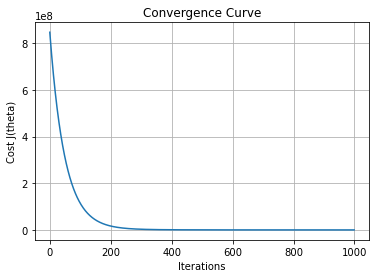

In [11]:
# PLOT COST CURVE
plt.plot(cost_hist)
plt.xlabel("Iterations")
plt.ylabel("Cost J(theta)")
plt.title("Convergence Curve")
plt.grid(True)
plt.show()

# Applying Simple Linear Regression 

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
df = pd.read_csv("my_mutiple regression.csv")

In [16]:
X_multi = df[['age', 'experience']]      
X_age = df[['age']]                      
X_exp = df[['experience']]               
y = df['income']

In [17]:
X_train_m, X_test_m, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)
X_train_age, X_test_age, _, _ = train_test_split(X_age, y, test_size=0.2, random_state=42)
X_train_exp, X_test_exp, _, _ = train_test_split(X_exp, y, test_size=0.2, random_state=42)

In [18]:
# 3. FEATURE SCALING
# --------------------------
scaler_m = StandardScaler()
X_train_m = scaler_m.fit_transform(X_train_m)
X_test_m = scaler_m.transform(X_test_m)

scaler_age = StandardScaler()
X_train_age = scaler_age.fit_transform(X_train_age)
X_test_age = scaler_age.transform(X_test_age)

scaler_exp = StandardScaler()
X_train_exp = scaler_exp.fit_transform(X_train_exp)
X_test_exp = scaler_exp.transform(X_test_exp)


In [19]:
# 4. SIMPLE LINEAR REGRESSION (age)
# --------------------------
lr_age = LinearRegression()
lr_age.fit(X_train_age, y_train)
pred_age = lr_age.predict(X_test_age)
mse_age = mean_squared_error(y_test, pred_age)

# --------------------------
# 5. SIMPLE LINEAR REGRESSION (experience)
# --------------------------
lr_exp = LinearRegression()
lr_exp.fit(X_train_exp, y_train)
pred_exp = lr_exp.predict(X_test_exp)
mse_exp = mean_squared_error(y_test, pred_exp)

# Comparison Linear VS Multiple Linear Regression 

In [21]:
# 7. RESULTS
# --------------------------
print("\n===== SIMPLE LINEAR REGRESSION (Age Only) =====")
print("Intercept:", lr_age.intercept_)
print("Coefficient:", lr_age.coef_)
print("MSE:", mse_age)



===== SIMPLE LINEAR REGRESSION (Age Only) =====
Intercept: 42426.25
Coefficient: [3052.54783242]
MSE: 19032892.076591834


In [24]:
# 6. MULTIPLE LINEAR REGRESSION
# --------------------------
lr_multi = LinearRegression()
lr_multi.fit(X_train_m, y_train)
pred_multi = lr_multi.predict(X_test_m)
mse_multi = mean_squared_error(y_test, pred_multi)


In [22]:
print("\n===== SIMPLE LINEAR REGRESSION (Experience Only) =====")
print("Intercept:", lr_exp.intercept_)
print("Coefficient:", lr_exp.coef_)
print("MSE:", mse_exp)


===== SIMPLE LINEAR REGRESSION (Experience Only) =====
Intercept: 42426.25
Coefficient: [8053.89864129]
MSE: 1313722.2998835794


In [23]:
print("\n===== MULTIPLE LINEAR REGRESSION (Age + Experience) =====")
print("Intercept:", lr_multi.intercept_)
print("Coefficients:", lr_multi.coef_)
print("MSE:", mse_multi)


===== MULTIPLE LINEAR REGRESSION (Age + Experience) =====
Intercept: 42426.25
Coefficients: [-884.53894609 8465.28543013]
MSE: 753796.7693734574


# Question No # 02 Solution 

# Heart Disease UCI Dataset

In [25]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [26]:
df = pd.read_csv("heart_cleveland_upload.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [27]:
# Features and target
X = df.drop(columns=['condition'])
y = df['condition']

In [30]:
# 2. TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# 3. PREPROCESSING (Standard Scaling for continuous variables)

continuous_cols = ['age','trestbps','chol','thalach','oldpeak']

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test_scaled[continuous_cols] = scaler.transform(X_test[continuous_cols])

# Single Decision Tree 

In [32]:
# 4. SINGLE DECISION TREE
dt = DecisionTreeClassifier(random_state=42)

start = time.time()
dt.fit(X_train_scaled, y_train)
train_time_dt = time.time() - start

y_pred_dt = dt.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("\n===== Decision Tree Results =====")
print("Test Accuracy:", accuracy_dt)
print("Training Time:", train_time_dt, "seconds")



===== Decision Tree Results =====
Test Accuracy: 0.7666666666666667
Training Time: 0.2176494598388672 seconds


# Random Forest 

In [33]:
# 5. RANDOM FOREST (varying n_estimators)

estimators = [1, 10, 50, 100, 300]
accuracies = []
train_times = []

for n in estimators:
    rf = RandomForestClassifier(
        n_estimators=n,
        random_state=42
    )
    
    start = time.time()
    rf.fit(X_train_scaled, y_train)
    train_time = time.time() - start
    
    y_pred_rf = rf.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_rf)
    
    accuracies.append(acc)
    train_times.append(train_time)

# 6. RESULTS FOR RANDOM FOREST

print("\n===== Random Forest Results =====")
for n, acc, t in zip(estimators, accuracies, train_times):
    print(f"n_estimators={n} → Accuracy={acc:.4f}, Training Time={t:.4f} sec")


===== Random Forest Results =====
n_estimators=1 → Accuracy=0.6500, Training Time=0.0080 sec
n_estimators=10 → Accuracy=0.7667, Training Time=0.0360 sec
n_estimators=50 → Accuracy=0.7333, Training Time=0.0726 sec
n_estimators=100 → Accuracy=0.7000, Training Time=0.1562 sec
n_estimators=300 → Accuracy=0.7167, Training Time=0.4692 sec


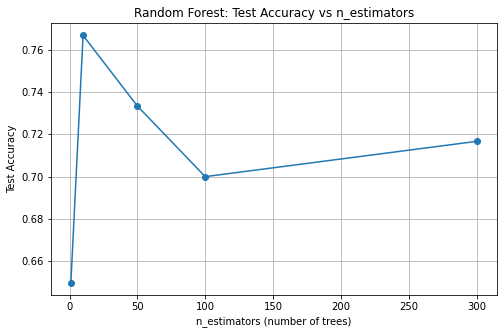

In [34]:
#PLOT: Test Accuracy vs n_estimators

plt.figure(figsize=(8,5))
plt.plot(estimators, accuracies, marker='o')
plt.title("Random Forest: Test Accuracy vs n_estimators")
plt.xlabel("n_estimators (number of trees)")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()